Custom Demo

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR))  # To find local version
# import custom
import custom_2

%matplotlib inline 

# Directory to save logs and trained model
# Just modify the custom20201207T0113
# 100 run test
MODEL_DIR = os.path.join(ROOT_DIR, "logs\\custom20201217T2351")
# 5 run test
# MODEL_DIR = os.path.join(ROOT_DIR, "logs\\custom20201207T0957"
# C:\Users\kongs\herlev\gpu_build\test\logs\custom20201217T2322
# C:\Users\kongs\herlev\gpu_build\test\logs\custom20201207T0113
# custom20201207T0113 - 500 step_epoch 100 epoch
# custom20201214T2114 - 100 step_epoch 10 epoch
# custom20201214T2227 - 200 step_epoch 10 epoch
# custom20201214T2259 - 300 step_epoch 10 epoch
# custom20201214T2338 - 400 step_epoch 10 epoch
# custom20201215T0034 - 500 step_epoch 10 epoch 

# Local path to trained weights file
CUSTOM_MODEL_PATH = os.path.join(MODEL_DIR, "mask_rcnn_custom_0010.h5")

# CUSTOM_MODEL_PATH = os.path.join(MODEL_DIR, "mask_rcnn_custom_0100.h5")
# Download COCO trained weights from Releases if needed
# if not os.path.exists(CUSTOM_MODEL_PATH):
#     utils.download_trained_weights(CUSTOM_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

class InferenceConfig(custom_2.CustomConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(CUSTOM_MODEL_PATH, by_name=True)

class_names = ['BG', 'carcinoma_in_situ', 'light_dysplastic', 'moderate_dysplastic',
               'normal_columnar', 'normal_intermediate', 'normal_superficiel', 'severe_dysplastic']

print(ROOT_DIR)
print(MODEL_DIR)
print(CUSTOM_MODEL_PATH)
print(IMAGE_DIR)

c:\users\kongs\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kongs\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kongs\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\kongs\anaconda3\envs\py36\lib\site-packages\tensorflow\python\frame








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 10
C:\Users\kongs\herlev\gpu_build\test
C:\Users\kongs\herlev\gpu_build\test\logs\custom20201217T2351
C:\Users\kongs\herlev\gpu_build\test\logs\custom20201217T2351\mask_rcnn_custom_0010.h5
C:\Users\kongs\herlev\gpu_build\test\images


Processing 1 images
image                    shape: (110, 113, 3)         min:   39.00000  max:  161.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:   -5.22000  max:  111.78000  float64
image_metas              shape: (1, 20)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


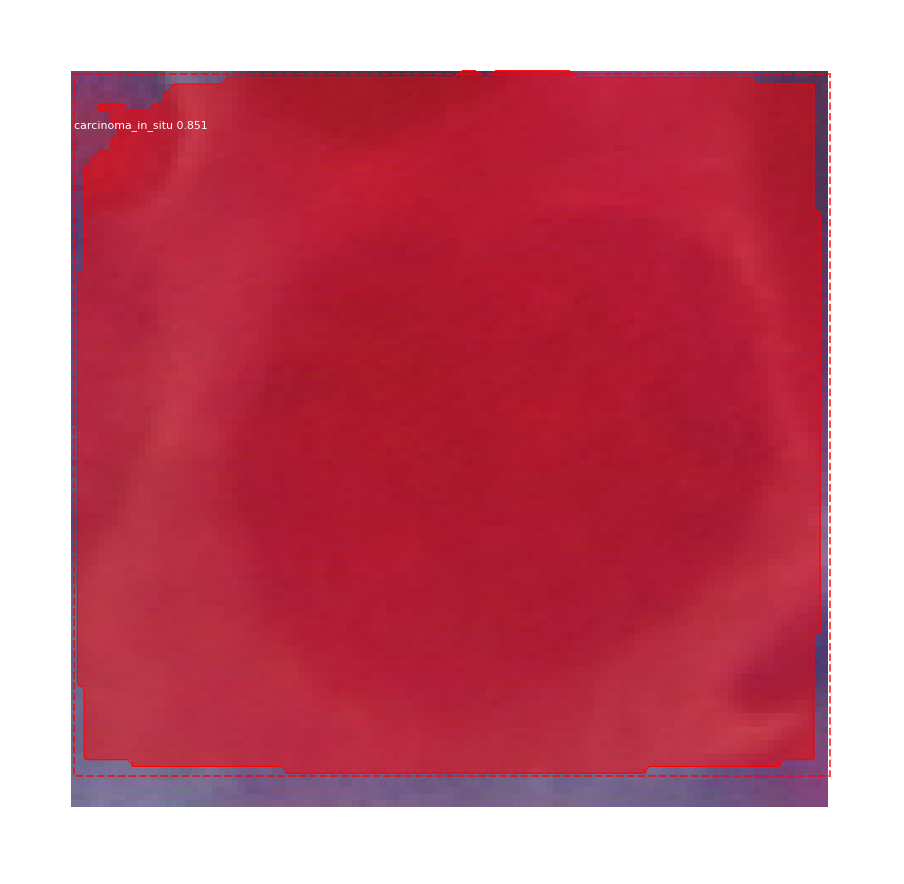

C:\Users\kongs\herlev\gpu_build\test\images\148848523-148848538-001.BMP
[1]


In [8]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
info = os.path.join(IMAGE_DIR, random.choice(file_names))
image = skimage.io.imread(info)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

print(info)
print(r['class_ids'])